# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

The dataset consists of TV shows and Movies available on Netflix as of 2019. The data is been colleced from third party search engine known as Flixable. They released the report in which shows the number of TV shows has been tripled since 2010. The streaming services number of movies has decreased by more than 2,000 titles since 2010. In this project I will analyze the data and find key insights by visualizing the data and I will preprocess the textual data as there are lots of categorical data and build a clustering model to make diffrent clusters and I will build recommender system by cosine similarity and recommended top 5 movies.

# **GitHub Link -**

https://github.com/umerulla

# **Problem Statement**


The dataset consists of TV shows and Movies of netlix as of 2019 and this dasta was collected by thier party searcch engine Flixable. The aim is to find the insights from the data and make diffrent clusters and build a recommender system.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import ttest_ind
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df =pd.read_csv('/content/drive/MyDrive/Almabetter/Unsupervised learning/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print('Total duplicated values in this dataset are',df.duplicated().sum())

Total duplicated values in this dataset are 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Total null values in each column')

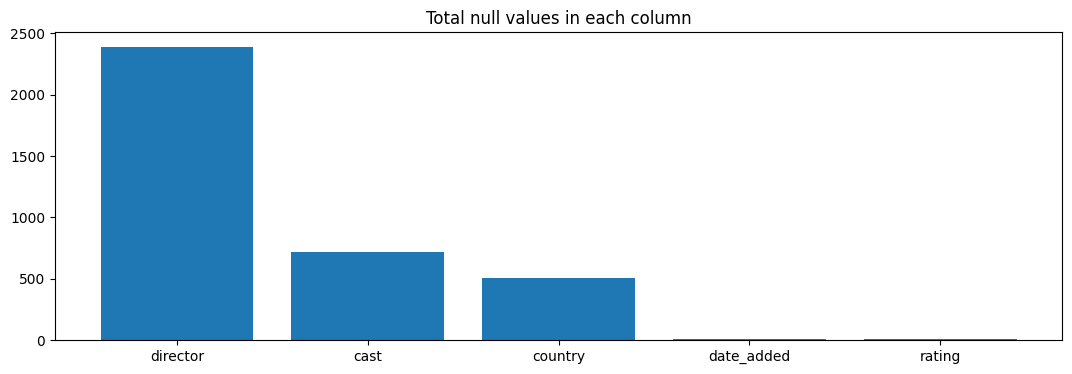

In [8]:
# Visualizing the missing values
null_values = df[['director','cast','country','date_added','rating']].isnull().sum()
fig = plt.figure(figsize = (13,4))
plt.bar(null_values.index, null_values.values)
plt.title('Total null values in each column')

### What did you know about your dataset?

The dataset has 7787 rows and 12 columns. The release_year column has the datatype as integer rest all columns have object as its datatype. The datatset has information of Tv shows and Movies with its release date, ratings,cast,director,country of production,date added,etc. In this dataset there are no duplicates present. The column director has 2389 null values, cast column has 718 null values, country has 507 null values, date_added column has 10 null values and rating has 7 null values.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

* show id:- Indicates the unique id of the show
* type:- Indicates the type of show(Movie or Tv show)
* title:- Title of the show
* Director:- Director of the show
* cast:- Actors involve in the show
* country:- Country of production
* date_added:- Date on which the show in added in Netflix
* release_date:- Release date of the show
* rating:- Tv rating of the show
* duration:- duration of the show
* listed_in:- Genre of the show
* description:- Short summary of the show

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
print(df.apply(lambda x : x.unique()))
print('-'*30)
print('total unique values in each column is \n', df.apply(lambda x : x.nunique()))


show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object
------------------------------
total unique values in each column is 
 show_id         7787
type               2
title           7787
director        4049
cast            6831
country          6

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# dropping the rows which contains 2020 and 2021 in release year column because the data we have as of 2019
df = df[(df['release_year'] != 2020) & (df['release_year'] != 2021)]

In [13]:
#Dropping the director column because there are lots of missing values
df = df.drop(['director'],axis=1)

# Dropping the null values present in date_added and rating because there are very less null values present
df = df.dropna(subset=['date_added','rating'])

# Filling the null values present in cast column
df['cast'] = df['cast'].fillna(value='Not available')

#Filling the null values of country column with mode
df['country'] = df['country'].fillna(value='Not Known')

In [14]:
#Changing the format of date_added column to pd.date_time
df['date_added'] = pd.to_datetime(df['date_added'])

#Creating new column like-day,month,year
df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

# Dropping the date_added column
df.drop('date_added',axis = 1 , inplace = True)

In [15]:
#Creating 2 diffrent dataframe based on TV shows and Movies for better visualization
Tv_shows = df[df['type'] == 'TV Show']
Movies = df[df['type'] == 'Movie']
print(Tv_shows.shape)
print(Movies.shape)

(1922, 13)
(4949, 13)


In [16]:
df.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020
5,s6,TV Show,46,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1,7,2017


### What all manipulations have you done and insights you found?

* Dropped the Director column because it contains lots of null values
* Dropped null values of date_added and rating column because there were very few null values present
* Filled the null values of cast as Not available
* Filled the null values of country as Not known
* Changed the format of  date_added column to pd.datetime
* Created 3 new columns (day_added,month_added,year_added) from date_added column
* Dropped the date_added column because 3 diffrent column with same information is been created
Created 2 new dataframe (Tv_shows , Movies) from main dataframe which has information of only Tv_shows and information only of Movies

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

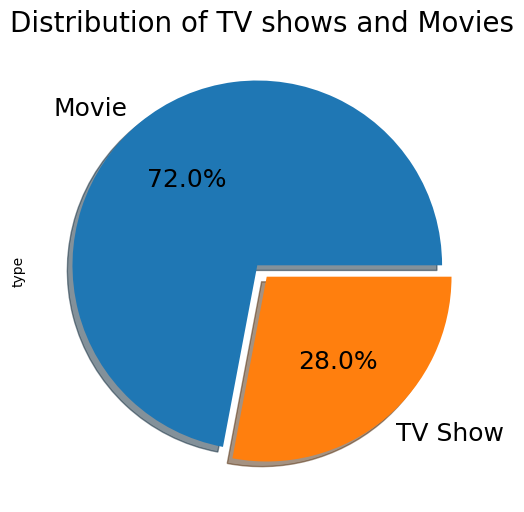

Movie      4949
TV Show    1922
Name: type, dtype: int64


In [17]:
# Chart - 1 visualization code
df['type'].value_counts().plot.pie(autopct='%1.1f%%',figsize = (8,6), fontsize= 18, explode = [0.04,0.04], shadow = True)
plt.title('Distribution of TV shows and Movies',fontsize = 20)
plt.show()

# prining the actual values
print(df['type'].value_counts())

##### 1. Why did you pick the specific chart?

Pie chart helps us to compare two variable as a whole

##### 2. What is/are the insight(s) found from the chart?

There are 72% of movies and 28% of Tv shows present in the data

#### Chart - 2

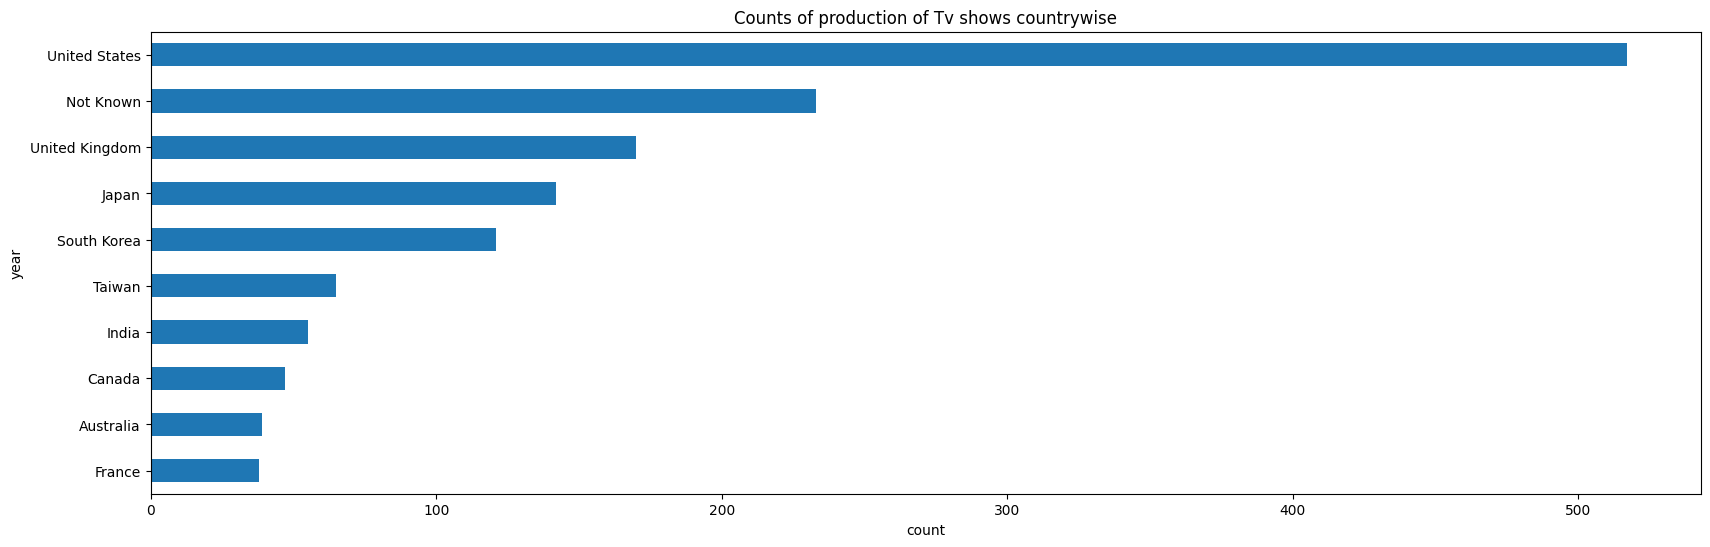

United States     517
Not Known         233
United Kingdom    170
Japan             142
South Korea       121
Taiwan             65
India              55
Canada             47
Australia          39
France             38
Name: country, dtype: int64


In [18]:
# Chart - 2 visualization code
plt.figure(figsize=(20, 6))
Tv_shows['country'].value_counts().head(10).sort_values(ascending = True).plot(kind='barh')

# title
plt.title('Counts of production of Tv shows countrywise')

plt.ylabel('year')
plt.xlabel('count')

plt.show()

# printing the counts
print(Tv_shows.country.value_counts().head(10))

##### 1. Why did you pick the specific chart?

Horizontal bar plot helps to know the distribution of Tv shows countrywise

##### 2. What is/are the insight(s) found from the chart?

The highest number of Tv shows are produced in USA followed by Uk,Japan, South Korea,Taiwan,India,Cannada,Australia and France

#### Chart - 3

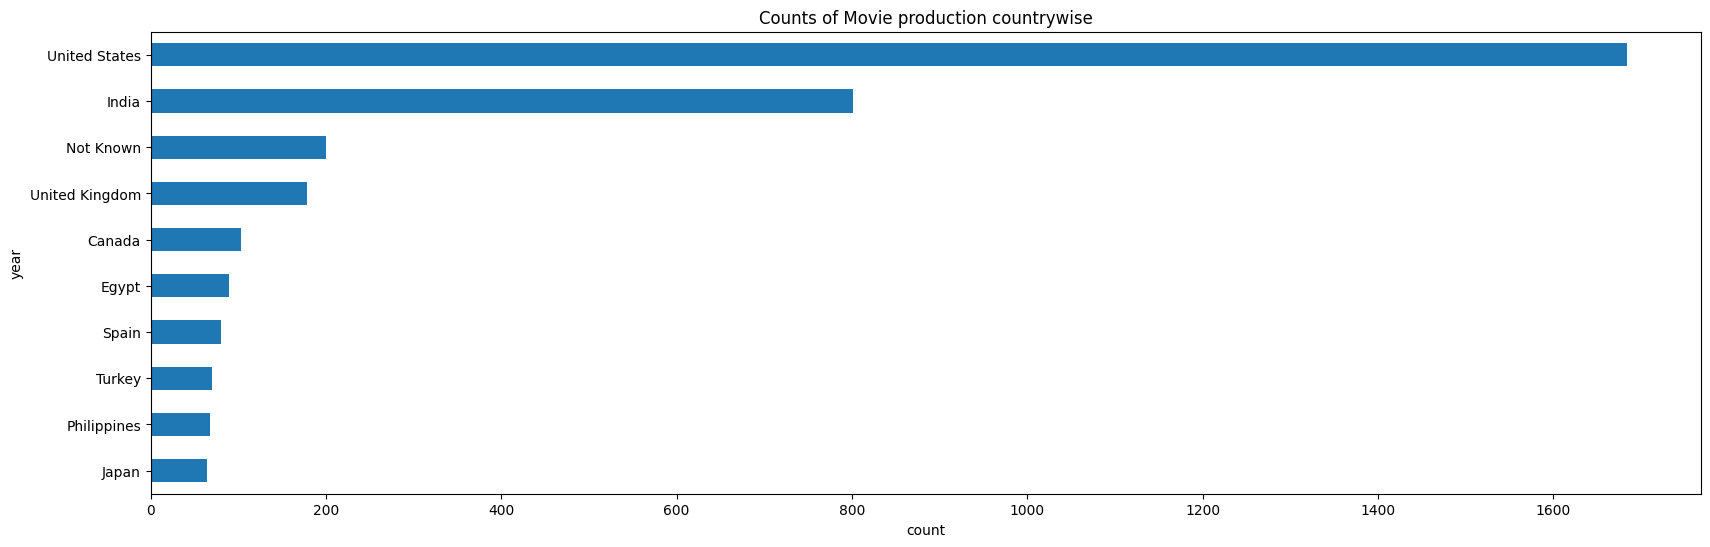

United States     1684
India              801
Not Known          200
United Kingdom     178
Canada             103
Egypt               89
Spain               80
Turkey              70
Philippines         68
Japan               64
Name: country, dtype: int64


In [19]:
# Chart - 3 visualization code
plt.figure(figsize=(20, 6))
Movies['country'].value_counts().head(10).sort_values(ascending = True).plot(kind='barh')

# title
plt.title('Counts of Movie production countrywise')

plt.ylabel('year')
plt.xlabel('count')

plt.show()

# printing the counts
print(Movies.country.value_counts().head(10))

##### 1. Why did you pick the specific chart?

Horizontal bar plot helps to know the distribution of movies countrywise

##### 2. What is/are the insight(s) found from the chart?

Usa procues maximum number of movies followed by India,Uk,Cannada,Egypt,Spain,Turkey,Phillipines and Japan

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

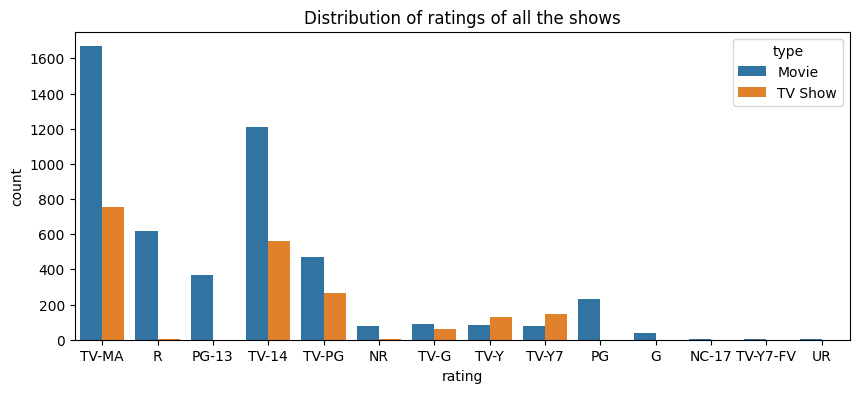

In [20]:
# Chart - 4 visualization code
plt.figure(figsize = (10,4))
sns.countplot(x='rating', data=df, hue = 'type')

# setting chart title
plt.title('Distribution of ratings of all the shows')

# display chart
plt.show()


##### 1. Why did you pick the specific chart?

Bar plot helps to know the distribution of ratings

##### 2. What is/are the insight(s) found from the chart?

TV-MA has the highest rating for both tv shows and movies followed by TV-14 and the least rating is of UR

#### Chart - 5

Text(0.5, 1.0, 'Distribution of Tv shows release year')

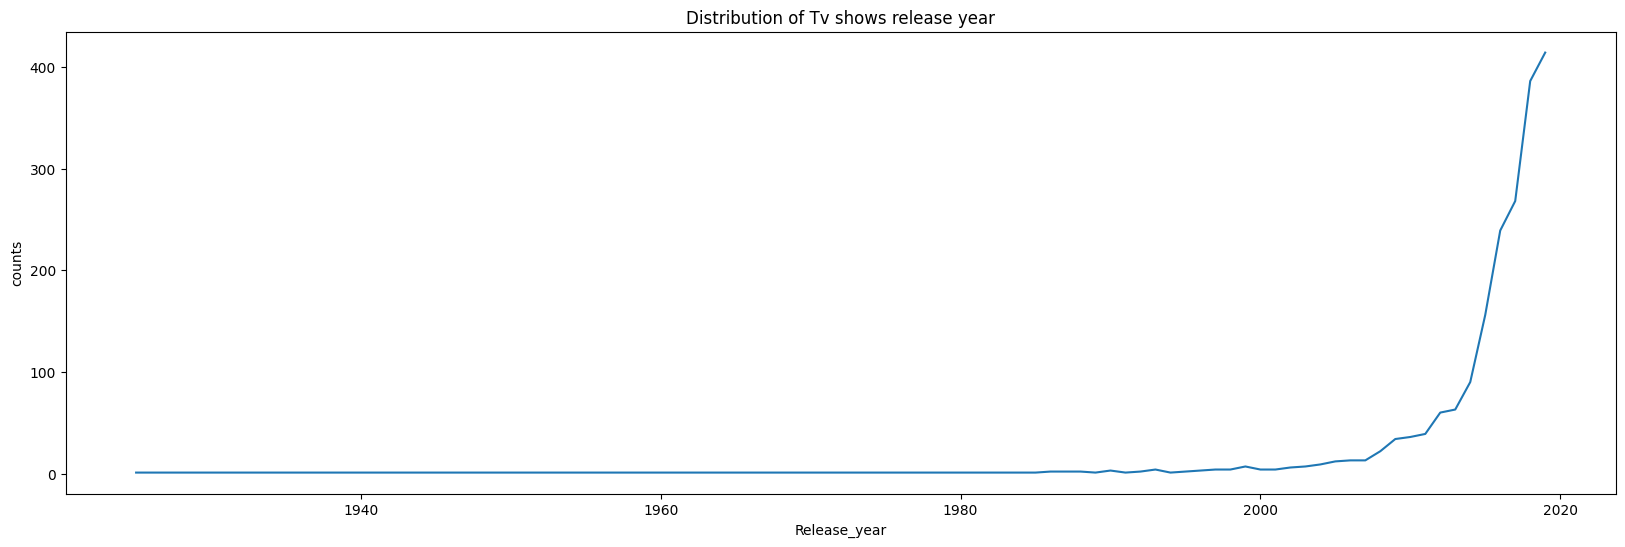

In [21]:
# Chart - 5 visualization code
ry_tv_data = Tv_shows['release_year'].value_counts().reset_index()
ry_tv_data.columns = ['Release_year','counts']

plt.figure(figsize = (20,6))
sns.lineplot(x = 'Release_year', y = 'counts', data = ry_tv_data)
plt.title('Distribution of Tv shows release year')

##### 1. Why did you pick the specific chart?

Lineplot helps used to analyze the trend

##### 2. What is/are the insight(s) found from the chart?

Ater 2010 there has been lot of new Tv shows been released

#### Chart - 6

Text(0.5, 1.0, 'Distribution of Movies release year')

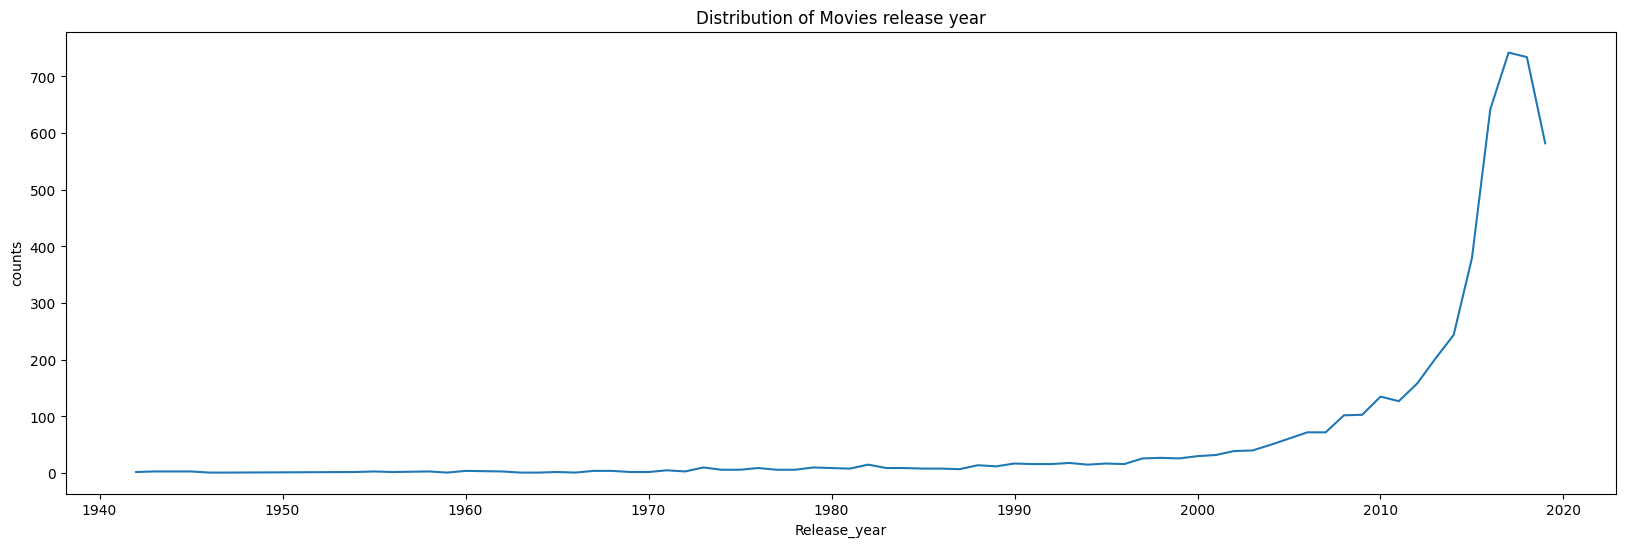

In [22]:
# Chart - 6 visualization code
# Chart - 7 visualization code
ry_movies_data = Movies['release_year'].value_counts().reset_index()
ry_movies_data.columns = ['Release_year','counts']

plt.figure(figsize = (20,6))
sns.lineplot(x = 'Release_year', y = 'counts', data = ry_movies_data)
plt.title('Distribution of Movies release year')

##### 1. Why did you pick the specific chart?

Lineplot helps used to analyze the trend

##### 2. What is/are the insight(s) found from the chart?

Ater 2010 there has been lot of new Tv shows been released

#### Chart - 7

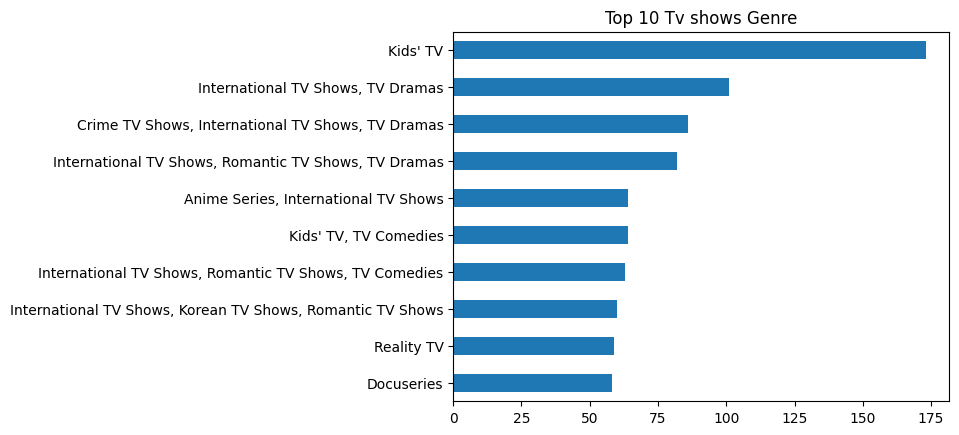

In [23]:
# Chart - 7 visualization code
Tv_shows['listed_in'].value_counts().head(10).sort_values(ascending = True).plot(kind='barh')
plt.title('Top 10 Tv shows Genre')

# display chart
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar plot helps to know the distribution of movies countrywise

##### 2. What is/are the insight(s) found from the chart?

There are highest number of Kids tv shows among all the tv shows followed by International Tv shows etc

#### Chart - 8

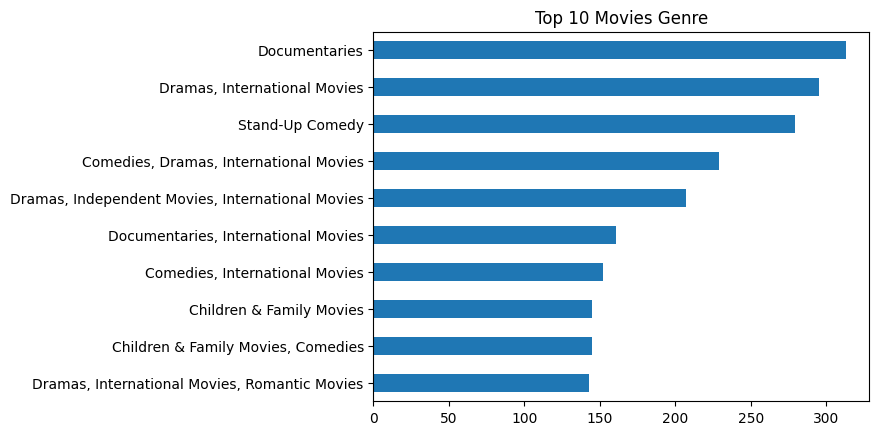

In [24]:
# Chart - 8 visualization code
Movies['listed_in'].value_counts().head(10).sort_values(ascending = True).plot(kind='barh')
plt.title('Top 10 Movies Genre')

# display chart
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar plot helps to know the distribution of movies countrywise

##### 2. What is/are the insight(s) found from the chart?

There are highest number of Documenteries Movies among all the Movies  followed by Dramas,International Tv shows etc

#### Chart - 9

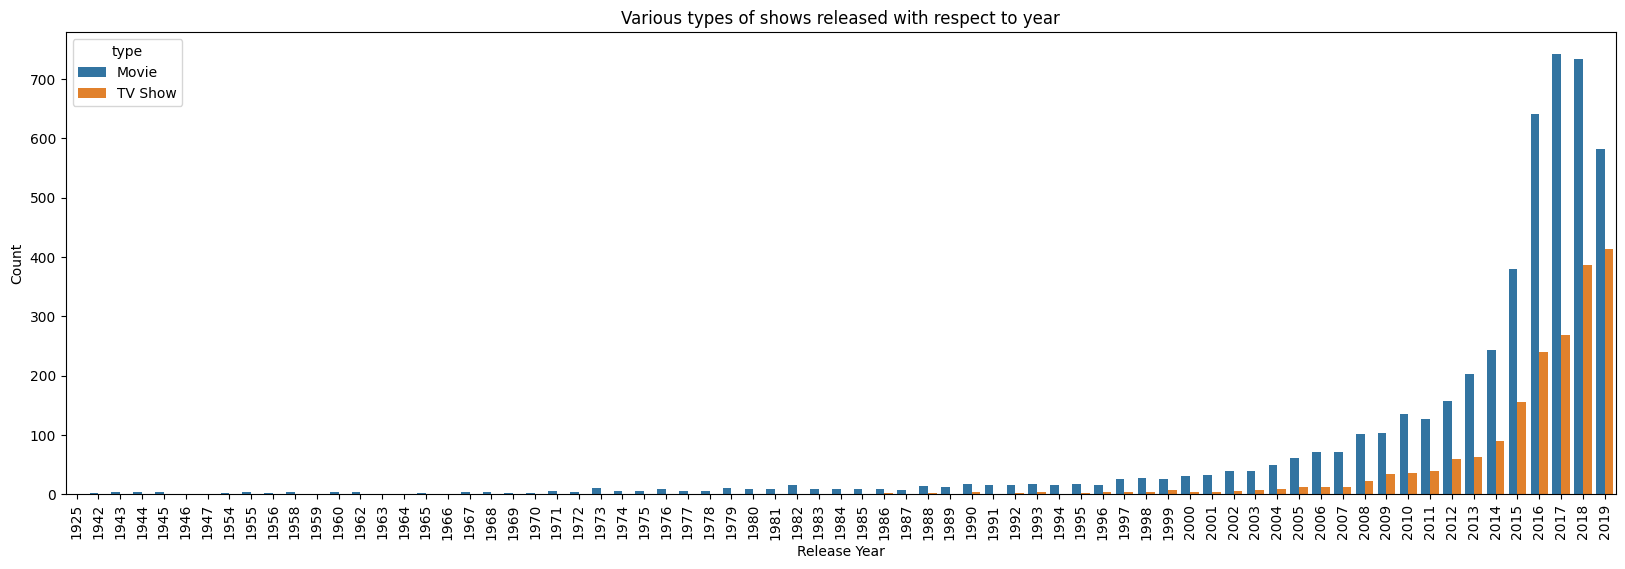

In [25]:
# Chart - 9 visualization code
plt.figure(figsize = (20,6))
sns.countplot(x='release_year',hue='type', data=df)

# setting chart title
plt.title('Various types of shows released with respect to year')
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('Count')

# display chart
plt.show()

##### 1. Why did you pick the specific chart?

Countplot helps to know the distribution of various types of shows with repect to release year

##### 2. What is/are the insight(s) found from the chart?

The release of Tv shows and Movies has been increased dramatically from 2010

Answer Here

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypotheses(H0):- The average number of and Movies released by United states are equal to Movies released in India

Alternate Hypotheses(H1):- The average number of and Movies released by United states are not equal to Movies released in India


#### 2. Perform an appropriate statistical test.

In [26]:
# Perform Statistical Test to obtain P-Value

# One dataframe containing only movies produced in the United States, and one containing only movies produced in India

Us_Movies = df[(df['type'] == 'Movie') & (df['country'] == 'United States')]
Inida_Movies = df[(df['type'] == 'Movie') & (df['country'] == 'India')]

# Perform a two-sample t-test between the release years of the two groups of movies
t_statistic, p_value = ttest_ind(Us_Movies['release_year'], Inida_Movies['release_year'], equal_var=False)
print(p_value)
print(t_statistic)
# Check if the calculated p-value is less than the significance level
if p_value < 0.05:
  print("We reject the null hypothesis. The average number of and Movies released by United states are not equal to Movies released in India")
else:
  # If the p-value is greater than or equal to the significance level, fail to reject the null hypothesis
  print("We fail to reject the null hypothesis.The average number of and Movies released by United states are equal to Movies released in India")

0.033903156470740076
2.12287994843175
We reject the null hypothesis. The average number of and Movies released by United states are not equal to Movies released in India


##### Which statistical test have you done to obtain P-Value?

I used 2 sample t test

##### Why did you choose the specific statistical test?

The test is conducted to know whether the average number of and Movies released by United states are equal to Movies released in India or not

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [27]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day_added       0
month_added     0
year_added      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have handled the missing values in data wrangling process

### 2. Handling Outliers

This is categorical data so no outliers are present

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [28]:
# Expand Contraction
#Creating a column that has all thye textual data for clustering
#except the title because title column has all the unique name and it will not be a good choice for clustering
#Type column is also excluded because we will cluster our data based on description,rating,cast, listed_in and country
df['textual_data'] = df['description'] + ' ' + df['rating'] + ' ' + df['country'] + ' ' + df['listed_in'] + ' ' + df['cast']

In [29]:
print(df['textual_data'][1])

After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive. TV-MA Mexico Dramas, International Movies Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato


#### 2. Lower Casing

In [30]:
# Lower Casing
#creating a function that will lowercase the data
def to_lower(x):
  return x.lower()

#applying the function to lowercase the data
df['textual_data'] = df['textual_data'].apply(to_lower)

In [31]:
print(df['textual_data'][1])

after a devastating earthquake hits mexico city, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive. tv-ma mexico dramas, international movies demián bichir, héctor bonilla, oscar serrano, azalia ortiz, octavio michel, carmen beato


#### 3. Removing Punctuations

In [32]:
# Remove Punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punctuation = text.translate(translator)

    # Return the text with punctuation removed
    return text_without_punctuation

df['textual_data'] = df['textual_data'].apply(remove_punctuation)

print(df['textual_data'][1])

after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive tvma mexico dramas international movies demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato


In [33]:
print(df['textual_data'][1])

after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive tvma mexico dramas international movies demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato


#### 4. Removing URLs & Removing words and digits contain digits.

In [34]:
# Remove URLs & Remove words and digits contain digits

# our column doesnot have links so removing numbers
df['textual_data'] = df['textual_data'].str.replace(r'\w*\d\w*', '', regex=True)

print(df['textual_data'][1])

after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive tvma mexico dramas international movies demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato


#### 5. Removing Stopwords & Removing White spaces

In [35]:
# Remove Stopwords
# Remove Stopwords
stop_words = stopwords.words('english')

#creating function to remove stopwords
def remove_stopwords(x):
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

# applying function to remove stopwords
df['textual_data'] = df['textual_data'].apply(remove_stopwords)

print(df['textual_data'][1])

 devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alive tvma mexico dramas international movies demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato


In [36]:
# remove white spaces in the 'textual data'
df['textual_data'] = df['textual_data'].str.strip()

print(df['textual_data'][1])

devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alive tvma mexico dramas international movies demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato


#### 6. Rephrase Text

not required

#### 7. Tokenization

not required

#### 8. Text Normalization

In [37]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

df['textual_data'] = df['textual_data'].apply(stemming)

# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)
# setting max features = 9000 to prevent system from crashing

print(df['textual_data'][1])

# fit the vectorizer using the text data
tfidf.fit(df['textual_data'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

devast earthquak hit mexico citi trap survivor walk life wait rescu tri desper stay aliv tvma mexico drama intern movi demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato


##### Which text normalization technique have you used and why?

The tf-idf vectorization is used to convert categorical data into numbers because machine larning model cannot work untill and unless numbers are provided in the data

#### 9. Part of speech tagging

not required

#### 10. Text Vectorization

In [38]:
# Vectorizing Text
# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

# convert vector into array form for clustering
vector = tfidf.transform(df['textual_data']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of vector : (6871, 9000)
datatype : <class 'numpy.ndarray'>


##### Which text vectorization technique have you used and why?

I used Tf-Idf technique to vectorize because it will assign proper value to the important words according to the text data

### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

There are 9000 columns and it need to reduced for better machine learning model

In [39]:
# DImensionality Reduction (If needed)
# Fitting the pca to our vector
pca = PCA()
pca.fit(vector)

PCA()

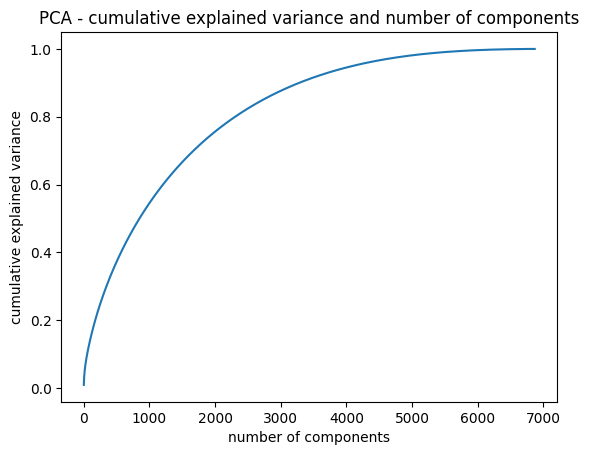

In [40]:
# Plotting graph to get best n_component value
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance and number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

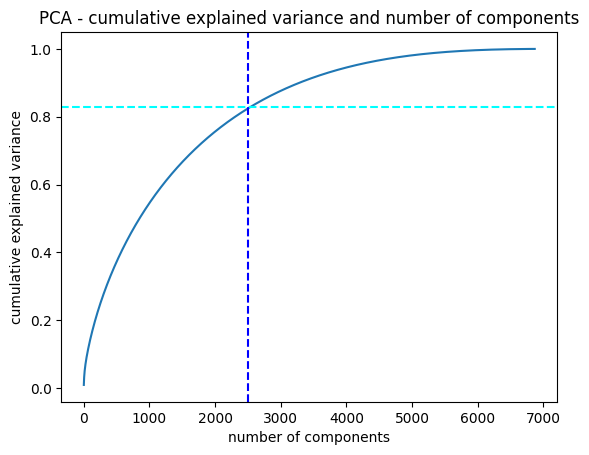

In [41]:
# Plotting graph to get best n_component value
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance and number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.83, color='cyan', linestyle='--')
plt.axvline(x= 2500, color='blue', linestyle='--')
plt.show()

In [42]:
# Fitting the vector with 2500 columns
pca = PCA(n_components=2500)
pca.fit(vector)

PCA(n_components=2500)

In [43]:
# Transforming the data
x_data = pca.transform(vector)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Principle component analysis has been used here because PCA helps to reduce the number of dimensions without much loss of data

## ***7. ML Model Implementation***

### ML Model - 1

In [44]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [45]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [46]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [47]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [48]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [49]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [50]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [51]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [52]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [53]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***